In [80]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from scipy import stats
import matplotlib.pyplot as plt

In [81]:
sdf = pd.read_csv('session.csv')
udf = pd.read_csv('users.csv')
bdf = pd.read_csv('bounce_rate.csv')

sdf['Sessions'] = sdf['Sessions'].str.replace(',', '').astype(int, errors='ignore')

udf['Users'] = udf['Users'].str.replace(',', '').astype(int, errors='ignore')

bdf['Bounce Rate'] = bdf['Bounce Rate'].str.rstrip('%').astype('float') / 100.0

df = pd.merge(pd.merge(sdf, udf, on= ['Day Index']), bdf, on=['Day Index'])
df.drop(df.tail(1).index, inplace=True)

df.head()

,Day Index,Sessions,Users,Bounce Rate
0,1/1/2022,1176,1082,0.5349
1,2/1/2022,1408,1303,0.5277
2,3/1/2022,1711,1568,0.5038
3,4/1/2022,2470,2251,0.4538
4,5/1/2022,2554,2312,0.4742


In [87]:
def plot_anomalies(df, method, columns, title, colors):
    anomalies = df[df[method] == -1] if method != 'Z_Score' else df[df[method] == 1]

    plt.figure(figsize=(10, 6))
    for column in columns:
        plt.plot(df['Day Index'], df[column], label=column, color=colors[column])
        plt.scatter(anomalies['Day Index'], anomalies[column], label=f'{column} Anomalies', color='k')
    
    plt.title(f'{title} - Method: ({method})')
    plt.xlabel('Day Index')
    plt.ylabel('Values')
    plt.legend()
    plt.show()

colors = {'Sessions': 'm', 'Users': 'y', 'Bounce Rate': 'c'}

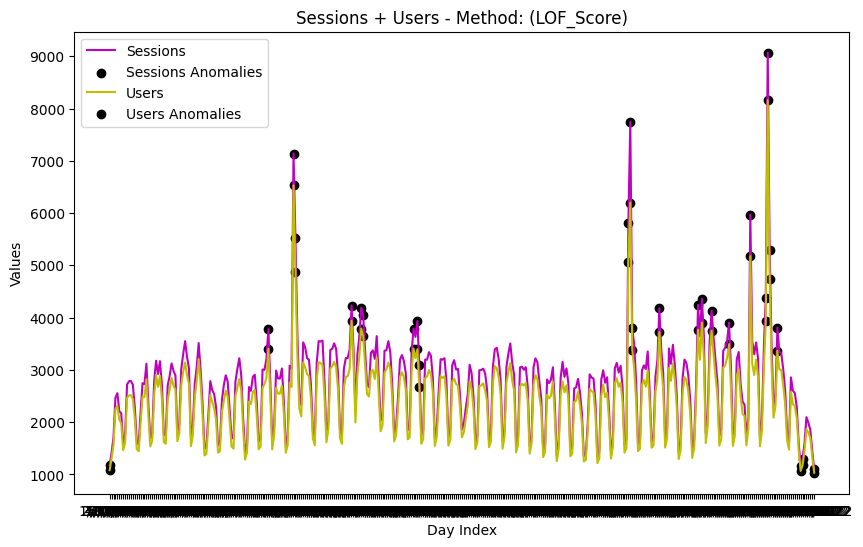

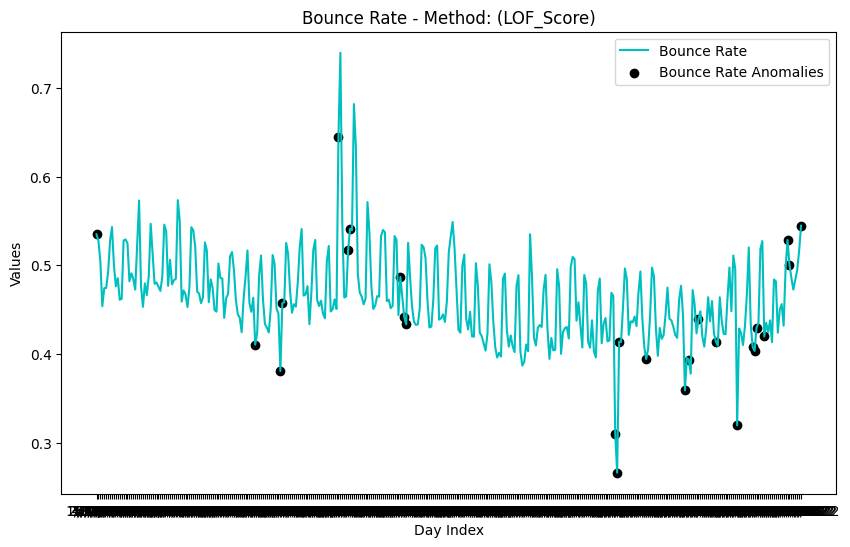

In [89]:
def detect_lof(data, n_neighbors=20):
    lof = LocalOutlierFactor(n_neighbors=n_neighbors)
    data['LOF_Score'] = lof.fit_predict(data[['Sessions', 'Users', 'Bounce Rate']])
    return data

df = detect_lof(df)
plot_anomalies(df, 'LOF_Score', ['Sessions', 'Users'], 'Sessions + Users', colors)
plot_anomalies(df, 'LOF_Score', ['Bounce Rate'], 'Bounce Rate', colors)

C:\Users\shrma\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


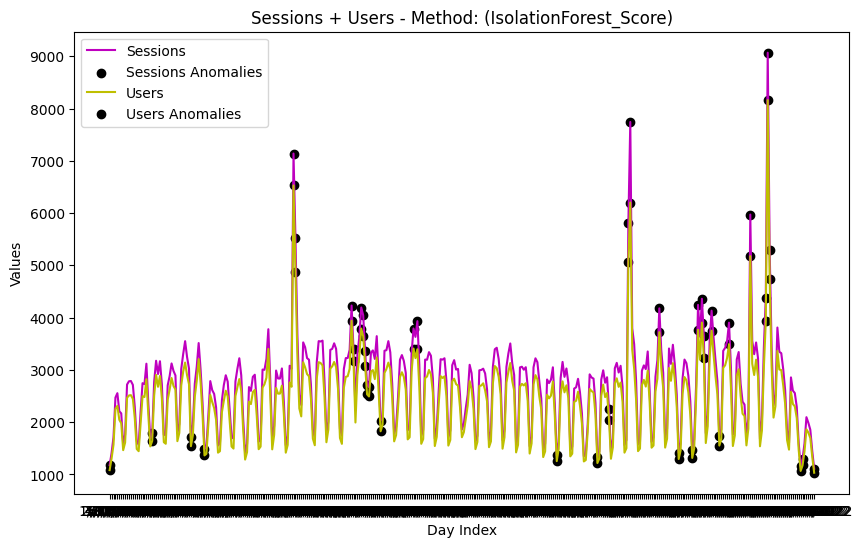

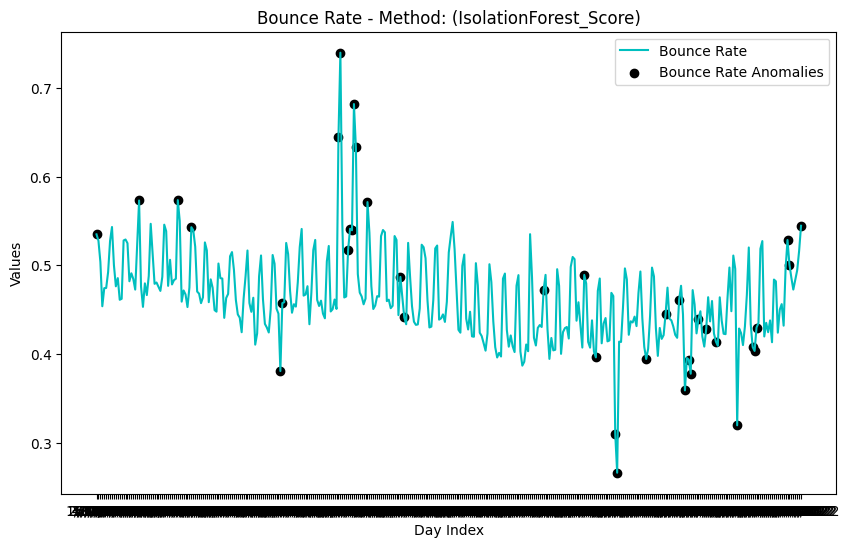

In [90]:

def detect_isolation_forest(data, contamination=0.1):
    iso_forest = IsolationForest(contamination=contamination)
    data['IsolationForest_Score'] = iso_forest.fit_predict(data[['Sessions', 'Users', 'Bounce Rate']])
    return data

df = detect_isolation_forest(df)
plot_anomalies(df, 'IsolationForest_Score', ['Sessions', 'Users'], 'Sessions + Users', colors)
plot_anomalies(df, 'IsolationForest_Score', ['Bounce Rate'], 'Bounce Rate', colors)

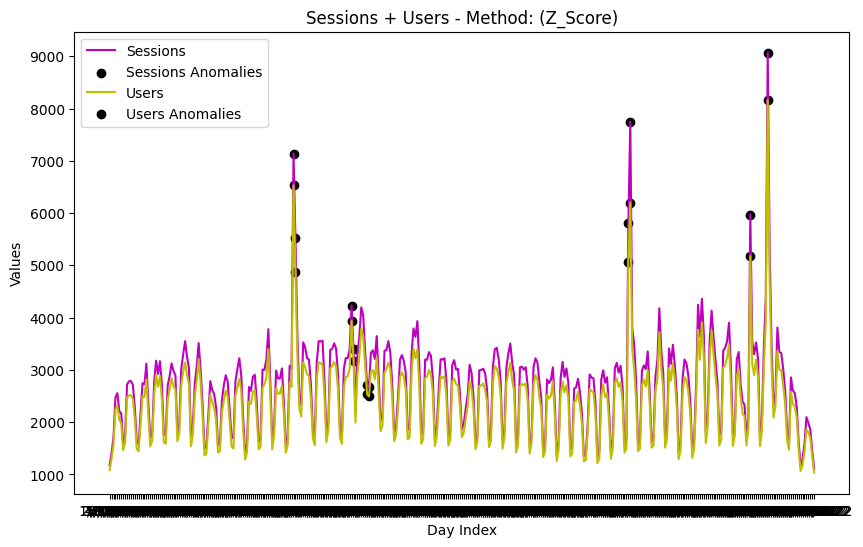

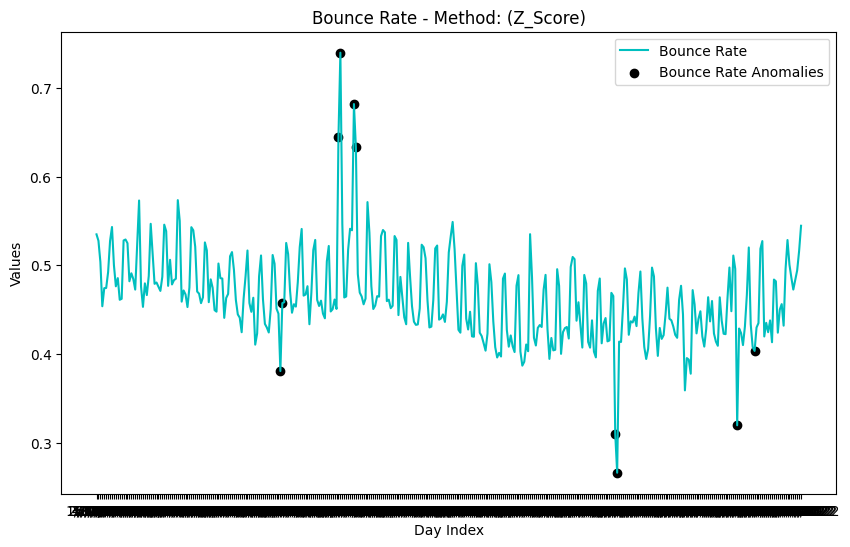

In [91]:
def detect_z_score(data, threshold=3):
    z_scores = np.abs(stats.zscore(data[['Sessions', 'Users', 'Bounce Rate']]))
    data['Z_Score'] = (z_scores > threshold).any(axis=1).astype(int)
    return data

df = detect_z_score(df)
plot_anomalies(df, 'Z_Score', ['Sessions', 'Users'], 'Sessions + Users', colors)
plot_anomalies(df, 'Z_Score', ['Bounce Rate'], 'Bounce Rate', colors)

In [86]:
df.to_csv('anomaly_detected_data.csv', index=False)